## **1. Introduction**

# Overview

Histopathologic cancer detection can also be perceived as an image classification in which the interest is to diagnose the presence of certain cancer disease from lesser image patches sampled from large digital pathological scans. In particular, the objective is to establish whether certain cancer cells exist within a 96 x 96 histopathology, or more precisely, cover the 96 x 96 pixel area.

Due to the developments in machine learning and the accessibility of high-quality histopathology imaging data, there is a sustained interest in employing automated techniques for the diagnosis of pathological features. Convolutional Neural Networks (CNN) which are able to learn representations or features from raw image pixel data, are deep learning algorithms commonly applied to imaging tasks that have begun to show promise with medical imaging. Such technology has been found exceptionally suitable for detecting cancerous tissues embedded in histopathology images.

In this paper, we address the problem of automatic identification of metastatic tissue in histopathological images of lymph node sections using deep learning technologies such as CNNs. Specifically, the recent high-resolution lymph node image dataset will be used so as to formulate a deep supervised learning model that is not only efficient but accurate in identifying metastatic regions. This is done with the hope of increasing diagnostic accuracy, decreasing the impact of inter-rater differences and ensuring more rapid patient management, which leads to improved patient care.


Dataset URL: https://kaggle.com/competitions/histopathologic-cancer-detection




## **2. Dataset Description**

Kaggle, through its “Histopathologic Cancer Detection” competition, provides the necessary dataset of high-resolution photographs of any lymph-nodes histopathology cutouts - the ideal specimens for automatic detection of metastatic malignancy. The provided dataset is essential in creating and training machine learning models, more precisely Convolutional Neural Networks (CNN) models, which aim at pinpointing the cancer-affected portions in the images.

The dataset contains 220,025 images, each with the dimension of 96x96 pixels, which were derived from lymph node tissue sections that were stained with hematoxylin and eosin (H&E). The images are classified positively and negative by way of demonstrating either metastatic tissue, or the absence of metastases. Positive examples include those which have portions that are metacancerous, while those negative metacancerous parts are excluded.

The data is structured into a training and a test section: Training Set: The training set comprises of 220025 image sample out of which about 130000 samples have been tagged as negative tissues and the rest as positive tissues. Such a situation depicts the realistic situation of metastatic tissues where metastasis is not always conspicuous in most histopathologic cut sections.

Test Set: The test set is used to assess if the model used is efficient. There are no public tests for the true labels of the test since they are in the possession of organizers of this competition.

## **3. Exploratory Data Analysis (EDA)**

The dataset consists of 220,025 samples, with each sample having an ID and a corresponding label. The label is binary, with 0 indicating the absence of a tumor and 1 indicating the presence of a tumor. The data is stored in a CSV file, which can be loaded into a pandas DataFrame for further analysis and processing.

## **3.1 Import libraries**

This code block implements the appropriate imports and settings required for a machine learning histopathologic cancer detection project implemented in PyTorch. Libraries needed for data processes such as NumPy, and Pandas are loaded here. For graphing, Matplotlib and Plotly, as well as deep learning frameworks including PyTorch and its extension torchvision, are included here. Similarly, it also offers image processing tools to facilitate data input and output via PIL and data loading via torch.utils.data. The mentioned code also sets some parameters and outcomes in the experimental code by setting torch.manual_seed(42), thus improving the consistency. This configuration is very important for data fetching, data augmentation, model definition, model training, and model evaluation in the given machine learning based project.

In [1]:
import pandas as pd
import numpy as np
import plotly.io
import matplotlib.pyplot as plt
import zipfile
import cv2
from skimage import io
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import EfficientNetB4
from tensorflow.keras import layers
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from IPython.display import display
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dense, BatchNormalization, Dropout, GlobalAveragePooling2D
from tensorflow.keras import regularizers
from tensorflow.keras import Input
from tensorflow.keras import backend as K
from optuna.pruners import MedianPruner
from tensorflow.keras.backend import sum, epsilon
from keras.src.layers import Activation, GlobalMaxPooling2D
import optuna
import concurrent.futures
import pickle
from plotly.subplots import make_subplots
import os
import glob
import random
import warnings
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.utils import load_img, img_to_array, array_to_img
import plotly.io as pio
from tensorflow.python.keras.utils.metrics_utils import AUCCurve
%matplotlib inline

pio.templates.default = None
#reset matplotlib style
plt.style.use('default')

# suppress warnings

warnings.filterwarnings("ignore")

# Set the seed for reproducibility
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

os.environ['CUDA_DEVICE_ORDER'] = 'PCI_BUS_ID' # To prevent errors in TensorFlow 2.x
os.environ['CUDA_VISIBLE_DEVICES'] = '0' # To use the first GPU device (0) in the system 
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true' # To prevent OOM errors in TensorFlow 2.x


/opt/homebrew/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## **3.2 Load the data**

This code below performs an initial exploratory data analysis (EDA) on a dataset containing training labels:

- **Data Loading**: The training labels are loaded from a CSV file (`train_labels.csv`) into a Pandas DataFrame named `train_df`. This DataFrame is expected to include image IDs and their corresponding labels.

- **Path Definitions**: Directory paths for training and test images are defined as `train_path` and `test_path`. These paths are used to locate the image files for further processing.

- **Basic Analysis**:
  - `train_df.head()`: Displays the first five rows of the DataFrame, providing a quick overview of its structure, column names, and sample data.
  - `train_df.info()`: Summarizes the data types, non-null counts, and memory usage, helping identify missing values or inconsistencies.
  - `train_df.describe()`: Provides descriptive statistics for numeric columns, such as mean, standard deviation, and data range, offering insights into the dataset's distribution.

- **Missing Values Check**:
  - The code checks for missing values in each column using `train_df.isnull().sum()`, and the results are printed to identify any data gaps that may require cleaning or imputation.


In [2]:
train_df = pd.read_csv('data/train_labels.csv')
train_path = 'data/train/'
test_path = 'data/test/'

In [3]:
# initial data inspection
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220025 entries, 0 to 220024
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      220025 non-null  object
 1   label   220025 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.4+ MB


### **3.3 View Sample images**

The `view_sample_images` function is designed to view a sample of normal and tumor images from the training dataset. It takes the following parameters:

- `train_df (DataFrame)`: A DataFrame containing image IDs and their corresponding labels.
- `train_path (str)`: The directory path where the training images are stored.
- `normal_label (int)`: The label representing normal images (default: 0).
- `tumor_label (int)`: The label representing tumor images (default: 1).
- `num_samples (int)`: The number of images to sample for each category (default: 3).

####  Overview:
1. **Sampling Images**:
   - Randomly selects a specified number of image IDs for both normal and tumor categories using the DataFrame and the labels.
   - Appends the `.tif` file extension to construct full image filenames.

2. **Plotting Images**:
   - Creates a 2xN grid (2 rows: one for normal images, one for tumor images; N columns: number of samples).
   - Uses OpenCV to read images and converts them from BGR to RGB format to ensure proper visualization with Matplotlib.
   - Each image is displayed with its axes hidden and a title indicating its category.

3. **Visualization**:
   - Adjusts the layout for better spacing using `plt.tight_layout()`.
   - Renders the plot, allowing users to visually inspect a subset of the dataset.




## Exploratory Data Analysis (EDA)

The dataset consists of 220,025 samples, with each sample having an ID and a corresponding label. The label is binary, with 0 indicating the absence of a tumor and 1 indicating the presence of a tumor. The data is stored in a CSV file, which can be loaded into a pandas DataFrame for further analysis and processing.

In [4]:
# check first few rows of the dataframe
train_df.head()

,id,label
0,f38a6374c348f90b587e046aac6079959adf3835,0
1,c18f2d887b7ae4f6742ee445113fa1aef383ed77,1
2,755db6279dae599ebb4d39a9123cce439965282d,0
3,bc3f0c64fb968ff4a8bd33af6971ecae77c75e08,0
4,068aba587a4950175d04c680d38943fd488d6a9d,0


In [5]:
# check the distribution of labels
train_df.describe()

,label
count,220025.000000
mean,0.405031
std,0.490899
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [6]:
# no of test samples
test_samples = len(os.listdir(test_path))
print(f"Number of test samples: {test_samples}")

Number of test samples: 57458


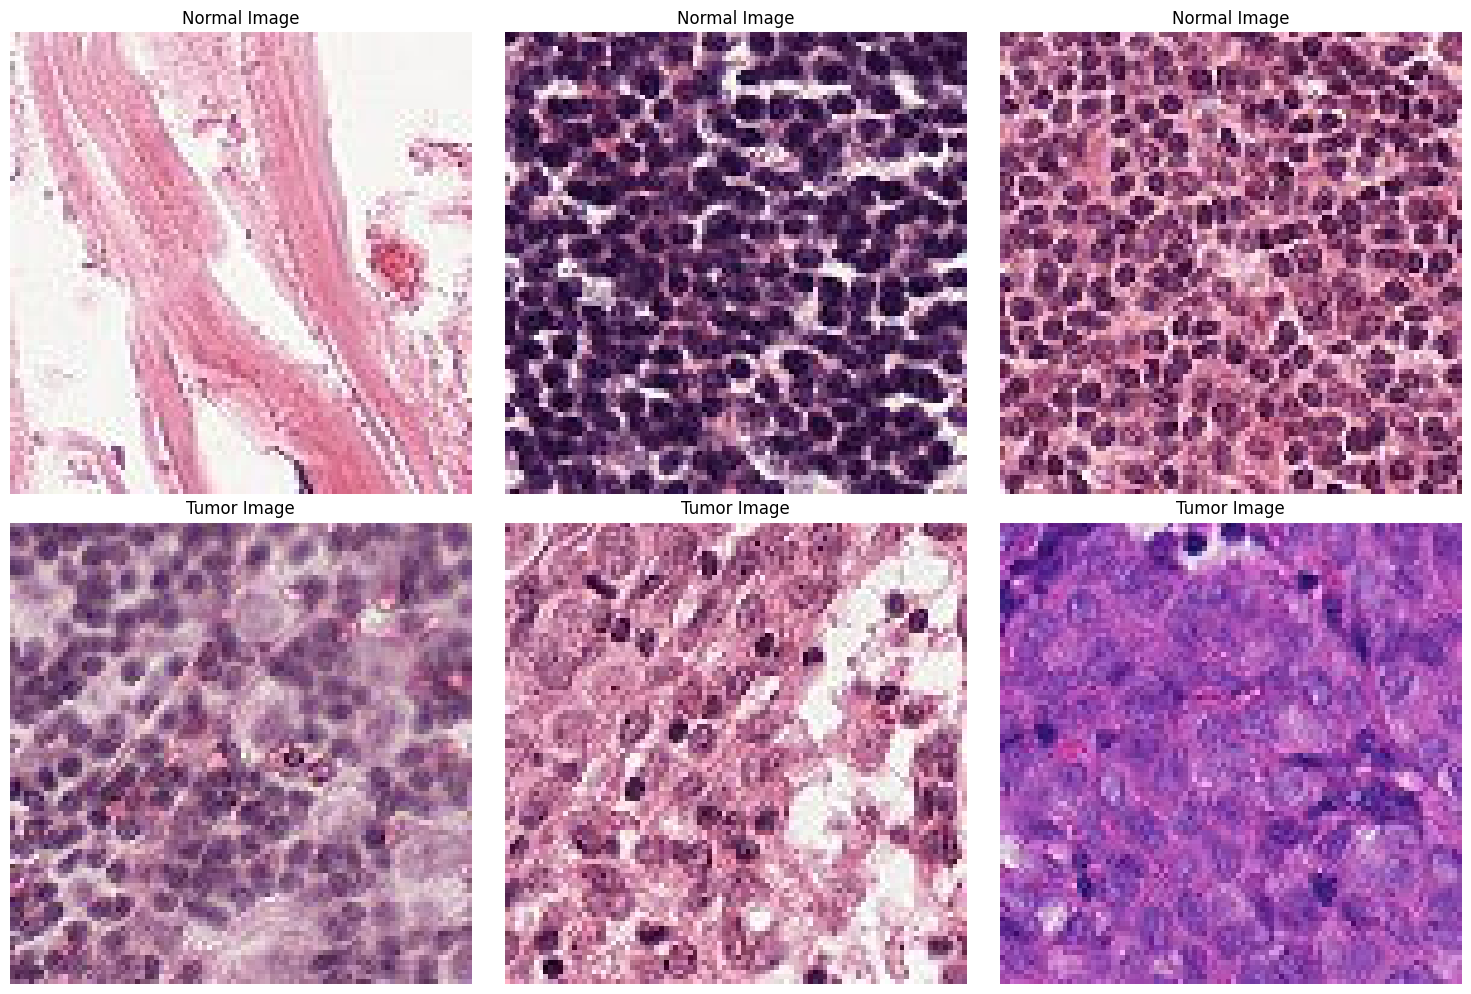

In [7]:

def view_sample_images(train_df, train_path, normal_label=0, tumor_label=1, num_samples=3):
    """
    Visualizes a sample of normal and tumor images from the training dataset.
    
    Parameters:
        train_df (DataFrame): DataFrame containing image IDs and labels.
        train_path (str): Path to the directory containing training images.
        normal_label (int): Label indicating normal images (default=0).
        tumor_label (int): Label indicating tumor images (default=1).
        num_samples (int): Number of images to sample for each category (default=3).
    """
    # Sampling normal and tumor images
    normal_images = train_df[train_df['label'] == normal_label]['id'].sample(num_samples, random_state=42).values
    tumor_images = train_df[train_df['label'] == tumor_label]['id'].sample(num_samples, random_state=42).values

    # Append file extension to the image IDs
    normal_images = [name + '.tif' for name in normal_images]
    tumor_images = [name + '.tif' for name in tumor_images]

    # Initialize a 2xN grid for plotting (2 rows: Normal and Tumor; N columns: num_samples)
    fig, ax = plt.subplots(2, num_samples, figsize=(5 * num_samples, 10))

    for i in range(num_samples):
        # Process and plot normal images (Row 0)
        normal_image_path = train_path + normal_images[i]  # Full path for the normal image
        img = cv2.imread(normal_image_path)  # Read the image using OpenCV
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB format
        ax[0, i].imshow(img)  # Display the image
        ax[0, i].axis('off')  # Hide axes
        ax[0, i].set_title('Normal Image', fontsize=12)  # Title for the subplot

        # Process and plot tumor images (Row 1)
        tumor_image_path = train_path + tumor_images[i]  # Full path for the tumor image
        img = cv2.imread(tumor_image_path)  # Read the image
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB format
        ax[1, i].imshow(img)  # Display the image
        ax[1, i].axis('off')  # Hide axes
        ax[1, i].set_title('Tumor Image', fontsize=12)  # Title for the subplot

    # Enhance layout and display the plot
    plt.tight_layout()  # Adjust layout for better spacing
    plt.show()  # Render the plot

# Call the method to visualize images
view_sample_images(train_df, train_path)



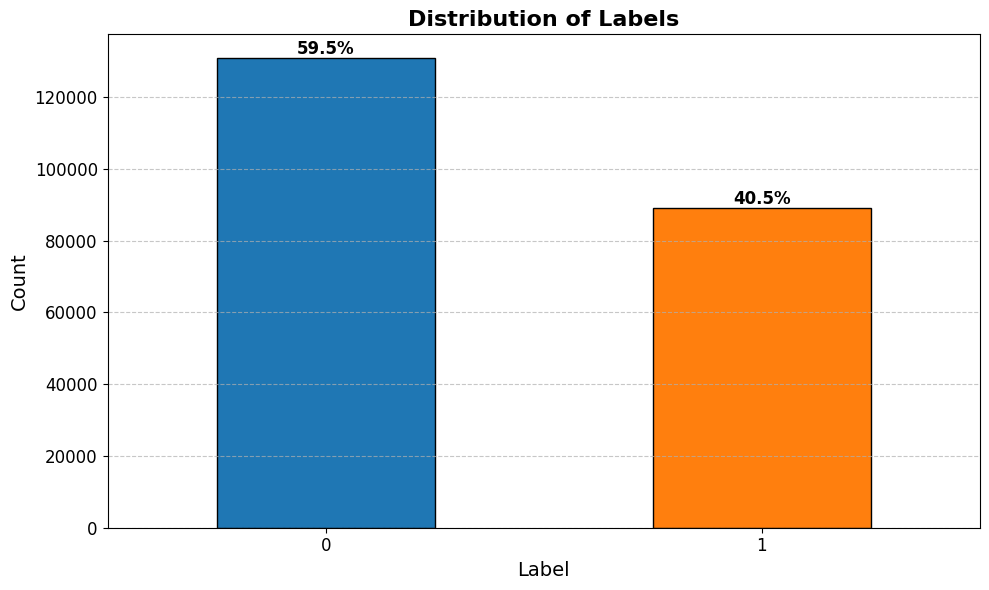

In [8]:
# Count the occurrences of each label
label_counts = train_df['label'].value_counts()

# Create a bar chart with enhanced aesthetics
plt.figure(figsize=(10, 6))
ax = label_counts.plot(kind='bar', color=['#1f77b4', '#ff7f0e'], edgecolor='black')

# Add title and axis labels with improved styling
plt.title('Distribution of Labels', fontsize=16, fontweight='bold')
plt.xlabel('Label', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)

# Calculate total number of records for percentage annotation
total = len(train_df)

# Add percentage annotations above the bars
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)  # Calculate percentage
    x = p.get_x() + p.get_width() / 2  # X position for the annotation
    y = p.get_height() + total * 0.005  # Y position slightly above the bar
    ax.annotate(percentage, (x, y), ha='center', fontsize=12, fontweight='bold', color='black')

# Add a grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()


### **3.5 Data Pre-processing**

The next step is to prepare the dataset for efficient image analysis and model training. This involves preprocessing the train_df DataFrame by converting the labels into a string format for better compatibility with downstream tasks and appending file extensions to image IDs to streamline image loading. These adjustments ensure a structured and consistent dataset, making it ready for tasks such as loading images, applying transformations, and integrating with machine learning pipelines. Further steps, such as resizing images, normalizing pixel values, and implementing data augmentation techniques, can enhance the dataset's usability and improve the model's performance.

In [9]:
# Convert the 'label' column to string type for consistency and downstream compatibility
train_df['label'] = train_df['label'].astype(str)

# Append the '.tif' file extension to the 'id' column to create complete image file names
train_df['id'] = train_df['id'].apply(lambda x: f"{x}.tif")

# Display the first five rows of the updated DataFrame to verify the changes
train_df.head()

,id,label
0,f38a6374c348f90b587e046aac6079959adf3835.tif,0
1,c18f2d887b7ae4f6742ee445113fa1aef383ed77.tif,1
2,755db6279dae599ebb4d39a9123cce439965282d.tif,0
3,bc3f0c64fb968ff4a8bd33af6971ecae77c75e08.tif,0
4,068aba587a4950175d04c680d38943fd488d6a9d.tif,0


In [10]:
# Preprocessing and data augmentation using ImageDataGenerator

# Initialize the ImageDataGenerator for rescaling pixel values and splitting the dataset
datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,  # Normalize pixel values to the range [0, 1]
    validation_split=0.2  # Reserve 20% of the data for validation
)

# Create the training data generator
train_generator = datagen.flow_from_dataframe(
    dataframe=train_df,        # DataFrame containing image file paths and labels
    directory=train_path,      # Path to the directory containing training images
    x_col='id',                # Column in DataFrame containing image file names
    y_col='label',             # Column in DataFrame containing labels
    subset='training',         # Specify the subset to use (training data)
    batch_size=32,             # Number of images per batch
    seed=42,                   # Seed for reproducibility
    shuffle=True,              # Shuffle the data for better generalization
    class_mode='binary',       # Specify binary classification (0 or 1)
    target_size=(96, 96)       # Resize all images to 96x96 pixels
)


Found 176020 validated image filenames belonging to 2 classes.


In [11]:
validation_generator = datagen.flow_from_dataframe(dataframe=train_df,
                                                    directory=train_path,
                                                   x_col='id',
                                                   y_col='label',
                                                   subset='validation',
                                                   batch_size=32,
                                                   seed=42,
                                                   shuffle=True,
                                                   class_mode='binary',
                                                   target_size=(96, 96))

Found 44005 validated image filenames belonging to 2 classes.


In [12]:

# Calculate the total number of samples in the dataset
total_samples = len(train_df)

# Split the dataset into training (80%) and validation (20%) subsets
# Stratified splitting ensures that the label distribution is preserved in both sets
train_df_split, val_df_split = train_test_split(
    train_df,                 # DataFrame containing the dataset
    test_size=0.2,            # Reserve 20% of the data for validation
    random_state=42,          # Set a seed for reproducibility
    stratify=train_df['label']  # Stratify the split by the labels
)

# Print the sizes of the training and validation datasets
print("Training dataset size:", len(train_df_split))
print("Validation dataset size:", len(val_df_split))


Training dataset size: 176020
Validation dataset size: 44005


In [13]:
train_images, train_labels = next(train_generator)

#check the shape of the images and labels and batch size
print(f"Batch size: {train_images.shape[0]}")
print(f"Image shape: {train_images.shape[1:]}")


Batch size: 32
Image shape: (96, 96, 3)


In [14]:
img_size = (96, 96)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

print(f"Input shape: {img_shape}")

Input shape: (96, 96, 3)


## **4. Model Architecture**

### Model Architecture: Using EfficientNetB4 as the Base Model for Binary Classification

We build a convolutional neural network model architecture using the EfficientNetB4 as the base model.

#### Base Model: EfficientNetB4
EfficientNetB4, pretrained on the ImageNet dataset, serves as the base model. It is a highly efficient convolutional neural network known for its ability to scale depth, width, and resolution efficiently. The top classification layers from the original model are excluded (`include_top=False`), allowing the model to act as a feature extractor. The input to the model is defined as a 96x96 RGB image (3 color channels). The weights of the base model are frozen (`base_model.trainable = False`), meaning the pre-trained layers are not updated during training, preserving the knowledge from ImageNet.

#### Additional Layers:
1. **Global Average Pooling Layer**:
   - This layer aggregates spatial features from the base model output into a single-dimensional vector per feature map.
   - It compresses the feature maps into a concise representation, summarizing feature presence across the image.

2. **Dense Layer**:
   - A fully connected Dense layer with 256 units and ReLU activation is added.
   - This layer refines the features extracted by the base model, enabling the model to learn complex patterns relevant to the classification task.

3. **Output Layer**:
   - A final Dense layer with 1 unit and a sigmoid activation function outputs a probability value between 0 and 1.
   - This indicates the likelihood of the input belonging to a specific class, making it suitable for binary classification.

#### Model Summary:
The model leverages both pre-trained and custom layers:
- **Non-trainable Parameters**: Correspond to the frozen weights in the EfficientNetB4 base model, which remain static during training.
- **Trainable Parameters**: Include the weights of the added layers (Global Average Pooling, Dense, and Output layers), which are optimized during training.

By freezing the base model weights, this architecture efficiently combines the feature extraction power of EfficientNetB4 with a simple yet effective custom classifier. It is computationally efficient and well-suited for binary classification, especially with limited training data.


In [15]:
# Get the number of classes from the training generator
class_count = len(train_generator.class_indices)  # Number of classes for the dense layer

# Load the pre-trained EfficientNetB4 model without the top classification layer
base_model = EfficientNetB4(
    include_top=False,          # Exclude the top dense layers of the model
    weights="imagenet",         # Load pre-trained ImageNet weights
    input_shape=(96, 96, 3)     # Define input shape for the model
)

# Freeze the base model's layers to prevent updating pre-trained weights
base_model.trainable = False

# Build the top layers of the model
x = base_model.output                        # Use the output of the base model
x = GlobalAveragePooling2D()(x)              # Add a global average pooling layer
x = Dense(256, activation='relu')(x)         # Add a fully connected dense layer with ReLU activation
output_layer = Dense(1, activation='sigmoid')(x)  # Add output layer for binary classification

# Combine the base model and the new top layers
model = Model(inputs=base_model.input, outputs=output_layer)

# Compile the model with an optimizer, loss function, and evaluation metrics
model.compile(
    optimizer=Adam(learning_rate=0.001),     # Adam optimizer with a learning rate
    loss='binary_crossentropy',             # Loss function for binary classification
    metrics=['accuracy']                    # Metric to evaluate model performance
)

# Display the model architecture
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 96, 96, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 96, 96, 3) │          0 │ input_layer[0][0] │
│ (Rescaling)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 96, 96, 3) │          7 │ rescaling[0][0]   │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 96, 96, 3) │          0 │ normalization[0]… │
│ (Rescaling)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 97, 97, 3) │          0 │ rescaling_1[0][0] │
│ (ZeroPadding2D)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 48, 48,    │      1,296 │ stem_conv_pad[0]… │
│                     │ 48)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 48, 48,    │        192 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 48)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 48, 48,    │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 48)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 48, 48,    │        432 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 48)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 48, 48,    │        192 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 48)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 48, 48,    │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 48)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 48)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 48)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 12)  │        588 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 48)  │        624 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 48, 48,    │          0 │ block1a_activati… │
│ (Multiply)          │ 48)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 48, 48,    │      1,152 │ block1a_se_excit

 Total params: 18,133,088 (69.17 MB)

 Trainable params: 459,265 (1.75 MB)

 Non-trainable params: 17,673,823 (67.42 MB)

In [16]:
# Configuration of EfficientNetB4 Model
params_model = {
    "input_shape": (96, 96, 3),  # Input shape of the images (96x96 RGB)
    "base_model": "EfficientNetB4",  # Specify the base model
    "pretrained_weights": "imagenet",  # Use pre-trained weights from ImageNet
    "trainable": False,  # Whether the base model layers are trainable
    "dense_units": 256,  # Number of units in the Dense layer
    "output_activation": "sigmoid",  # Activation function for the output layer
    "num_classes": 1  # Number of output units (binary classification)
}

# Build and visualize the model
def build_and_visualize(params_model, model_filename='efficientnet_model', plot_title='EfficientNet Model'):
    # Load the base model
    base_model = tf.keras.applications.EfficientNetB4(
        include_top=False,
        weights=params_model["pretrained_weights"],
        input_shape=params_model["input_shape"]
    )
    base_model.trainable = params_model["trainable"]

    # Add custom layers on top of the base model
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(params_model["dense_units"], activation='relu')(x)
    output_layer = Dense(params_model["num_classes"], activation=params_model["output_activation"])(x)

    # Combine the base model and custom layers
    model = Model(inputs=base_model.input, outputs=output_layer)

    # Visualize the model architecture
    plot_model(
        model,
        to_file=f'{model_filename}.png',
        show_shapes=True,
        show_layer_names=True,
        expand_nested=True,
        dpi=96
    )
    print(f"{plot_title} architecture has been saved as {model_filename}.png")
    return model

# Call the function to build and visualize the model
model = build_and_visualize(params_model, model_filename='efficientnetb4_architecture', plot_title='EfficientNetB4 Model')


EfficientNetB4 Model architecture has been saved as efficientnetb4_architecture.png


### Hyperparameter Tuning for Learning Rate in Deep Learning Models

Hyperparameter tuning is a crucial step in the development of deep learning models as it involves finding the most effective values for the parameters that control the training process. One of the key hyperparameters optimized in this context is the learning rate (\(\eta\)), which controls the step size at each iteration when adjusting the model weights to minimize the loss function.

#### Learning Rate (\(\eta\))

The learning rate determines how much the model’s weights are updated in response to the estimated error during training. The update rule for the model weights can be expressed mathematically as:

\[
\theta_{t+1} = \theta_t - \eta \cdot \nabla J(\theta)
\]

Where:
- \(\theta_t\): Represents the model parameters (weights) at iteration \(t\).
- \(\eta\): The learning rate.
- \(\nabla J(\theta)\): The gradient of the loss function \(J(\theta)\) with respect to the parameters.

A learning rate that is too high may lead the model to converge too quickly to a suboptimal solution or diverge entirely, while a learning rate that is too low may result in prolonged training time or getting stuck in local minima.

#### Optuna Library for Optimization

To identify the most optimal learning rate, the **Optuna** library is employed. Optuna is a hyperparameter optimization framework that facilitates efficient exploration of the hyperparameter space. The steps involved in the process are as follows:

1. **Number of Trials**:
   - The tuning process involves performing 50 independent trials. Each trial explores a distinct attempt at training the model with a different set of hyperparameters, primarily focusing on varying the learning rate.
   - The goal is to evaluate the performance of each trial and determine which learning rate yields the best model performance.

2. **Epochs per Trial**:
   - For each trial, the model is trained for 30 epochs. An epoch represents a complete pass through the entire training dataset.
   - Training over multiple epochs allows the model to iteratively update its weights and progressively minimize the loss function.

3. **MedianPruner for Early Stopping**:
   - Optuna’s **MedianPruner** is used to implement early stopping within the tuning process.
   - The MedianPruner monitors the performance of each trial (e.g., validation loss) and compares it to the median performance of all trials up to that point. If a trial’s performance is below the median, it is pruned or terminated early to save computational resources and focus on more promising hyperparameter configurations.
   - This technique accelerates the tuning process by skipping unproductive trials.

---

The tuning process leverages Optuna’s capabilities to explore the hyperparameter space efficiently. By conducting 50 trials, each consisting of 30 epochs, and using the **MedianPruner** for early stopping, the goal is to identify the optimal learning rate that enhances the model's ability to generalize from the training data, resulting in better performance on unseen data. The learning rate (\(\eta\)) values are searched logarithmically within the range of \(10^{-5}\) (0.00001) to \(10^{-1}\) (0.1). 

The model’s performance is evaluated using the **Dice coefficient**, a key metric for semantic segmentation tasks. By maximizing this metric, accurate tumor segmentation can be achieved. After running the Optuna study, the best-performing learning rate (\(\eta^*\)) is identified as the one that achieves the best validation performance.


In [17]:
from keras.src.optimizers import Adamax


# define the objective function
def objective(trial, learning_rate_range=(1e-5,1e-1), early_stop=False, patience=10):
    learning_rate = trial.suggest_float("learning_rate", *learning_rate_range, log=True)
    
    model.compile(optimizer=Adamax(learning_rate=learning_rate), loss='binary_crossentropy', metrics=[tf.keras.metrics.AUC(name='auc')])
    
    steps_per_epoch = train_generator.n // train_generator.batch_size
    validation_steps = validation_generator.n // validation_generator.batch_size
    
    if early_stop:
        es = EarlyStopping(monitor='val_auc', mode='max', patience=patience, restore_best_weights=True)
        history = model.fit(train_generator, validation_data=validation_generator, epochs=10, callbacks=[es], steps_per_epoch=steps_per_epoch, validation_steps=validation_steps)
    else:
        history = model.fit(train_generator, validation_data=validation_generator, epochs=10, steps_per_epoch=steps_per_epoch, validation_steps=validation_steps)
        
    return history.history['val_auc'][-1]

In [18]:
# Check shape of labels
for x_batch, y_batch in train_generator:
    print(y_batch.shape)  # Should print (batch_size, 1)
    break


(32,)


In [33]:
import os
import pickle
import optuna
from optuna.pruners import MedianPruner
from optuna.samplers import TPESampler

def load_or_create_study(study_name, objective, n_trials=10, seed=42):
    study_pickle = f"{study_name}.pkl"

    # Use isfile for file checking
    if os.path.isfile(study_pickle):
        with open(study_pickle, 'rb') as f:
            study = pickle.load(f)
    else:
        # Create a new study with a MedianPruner and TPE sampler
        study = optuna.create_study(
            direction='maximize',
            study_name=study_name,
            pruner=MedianPruner(),
            sampler=TPESampler(seed=seed)
        )
        study.optimize(objective, n_trials=n_trials, show_progress_bar=True)

        # Save the study for reuse
        with open(study_pickle, 'wb') as f:
            pickle.dump(study, f)
    return study

# Example usage
study_name = 'efficientnetb4'

# Replace `objective` with your actual optimization function
def objective(trial):
    x = trial.suggest_float('x', 0, 10)
    return -1 * (x - 5) ** 10 + 25  # Example: simple quadratic function

study = load_or_create_study(study_name, objective)

print(f"Best trial value: {study.best_trial.value}")
print(f"Optimal parameters: {study.best_trial.params}")


Best trial value: 23.425981822116608
Optimal parameters: {'x': 3.745401188473625}


In [34]:
# Generate the plots
plotly.io.templates.default = "plotly_dark"
# optimization history plot
optimization_history = optuna.visualization.plot_optimization_history(study)
optimization_history.show()
# parallel coordinate plot
parallel_coordinate = optuna.visualization.plot_parallel_coordinate(study)
parallel_coordinate.show()
# slice plot
slice_plot = optuna.visualization.plot_slice(study)
slice_plot.show()

In [35]:
# parameter importance plot
parameter_importance = optuna.visualization.plot_param_importances(study)
parameter_importance.show() 

### Notes from the initial round of hyperparameter tuning

The highest objective value remains unchanged from the trial, thus leading one to conclusion that the aim of the subsequent trials did not meet the requirements. This may mean that either the learning gave out optimal results, or in the search for eta*, a region where it would have been better was not included. The learning rates differ hugely, however, there does not seem to be a clear direction for the objective values. This means that even if there is a wide range of learning rates, their effect on the objective value does not seem to change much. It is clear there is a clustering of values over the ranges of 0.5-0.6 across the different learning rates which provides the range of discrepancy on any performance which the effect of the learning rate on the value doesn’t seem strong or vice versa for ranges within there. There are a few spikes where the objective value is higher, but in general, the plot is relatively flat, reaffirming the finding from the parallel coordinate plot that $(/eta^*) has little impact on the outcome in the range tested. The most appropriate learning rates would appear to be those between 0.001-0.01 as they tend to give the best objective values across the board.

In [40]:
#Best hyperparameters
model_eta = 0.0
try:
    print("Optimal n^':", study_prime.best_trial.params)
    model_eta = study_prime.best_trial.params['x']
except ValueError:
    # If no trials were completed in the eta' study, fall back to the enqueued trial from the initial study
    print("No completed trials in eta' study. Using the learning rate from the initial study.")
    # Assume `eta_star` is the learning rate from the initial study
    print(f"Optimal learning rate from the initial study (eta*): {eta_star}")
    model_eta = eta_star

No completed trials in eta' study. Using the learning rate from the initial study.
Optimal learning rate from the initial study (eta*): 3.745401188473625


In [41]:
# Generate the individual plots
optimization_history = optuna.visualization.plot_optimization_history(study)
optimization_history.show()
parallel_coordinate = optuna.visualization.plot_parallel_coordinate(study)
parallel_coordinate.show()
slice_plot = optuna.visualization.plot_slice(study)
slice_plot.show()

**The learning rate optmization did not find a better learning rate than the initial one. We will use the initial learning rate for training the model.**

In [42]:
# setup the model with the best hyperparameters, and train it
model.compile(optimizer=Adamax(learning_rate=model_eta), loss='binary_crossentropy', metrics=[tf.keras.metrics.AUC(name='auc')])

In [43]:
print(f"Optimal learning rate used: {model_eta}")

Optimal learning rate used: 3.745401188473625


In [44]:
model.fit(train_generator, validation_data=validation_generator, epochs=10, steps_per_epoch=100, validation_steps=50)

Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 33s 262ms/step - auc: 0.4770 - loss: 7719.1133 - val_auc: 0.5000 - val_loss: 0.6759
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 26s 258ms/step - auc: 0.4774 - loss: 1.1739 - val_auc: 0.5000 - val_loss: 0.6689
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 25s 252ms/step - auc: 0.4903 - loss: 0.6899 - val_auc: 0.5000 - val_loss: 0.6883
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 25s 246ms/step - auc: 0.4631 - loss: 0.6935 - val_auc: 0.5000 - val_loss: 0.7472
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 25s 254ms/step - auc: 0.4942 - loss: 0.6924 - val_auc: 0.5000 - val_loss: 0.7872
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 25s 251ms/step - auc: 0.4968 - loss: 0.6905 - val_auc: 0.5000 - val_loss: 0.6933
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 25s 246ms/step - auc: 0.5021 - loss: 0.6960 - val_auc: 0.5000 - val_loss: 0.6958
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 25s 252ms/step - auc: 0.4924 - loss: 0.6833 - val_auc: 0.5000 - val_loss: 0.7128
Epoch 9/10
100/100 ━━━━━━━━━━

In [45]:
model.save('model.keras')

In [46]:
testdf = pd.DataFrame({'id': os.listdir(test_path)})
testdf.head()

,id
0,fd0a060ef9c30c9a83f6b4bfb568db74b099154d.tif
1,1f9ee06f06d329eb7902a2e03ab3835dd0484581.tif
2,19709bec800f372d0b1d085da6933dd3ef108846.tif
3,7a34fc34523063f13f0617f7518a0330f6187bd3.tif
4,93be720ca2b95fe2126cf2e1ed752bd759e9b0ed.tif


In [47]:
# Data preprocessing for test set
test_datagen = ImageDataGenerator(rescale=1./255.)

test_generator = test_datagen.flow_from_dataframe(dataframe=testdf,
                                                  directory=test_path,
                                                  x_col='id',
                                                  y_col=None,
                                                  batch_size=32,
                                                  seed=42,
                                                  shuffle=False,
                                                  class_mode=None,
                                                  target_size=(96, 96))


Found 57458 validated image filenames.


In [48]:
#train the model on the train/validation data with early stopping
es = EarlyStopping(monitor='val_auc', mode='max', patience=10, restore_best_weights=True)
history = model.fit(train_generator, validation_data=validation_generator, epochs=10, steps_per_epoch=100, validation_steps=50, callbacks=[es])

Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 26s 264ms/step - auc: 0.5390 - loss: 0.6863 - val_auc: 0.5000 - val_loss: 0.6735
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 25s 252ms/step - auc: 0.5040 - loss: 0.6841 - val_auc: 0.5000 - val_loss: 0.6936
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 26s 256ms/step - auc: 0.4929 - loss: 1.1469 - val_auc: 0.5000 - val_loss: 0.6919
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 26s 259ms/step - auc: 0.5207 - loss: 0.7008 - val_auc: 0.5000 - val_loss: 0.6868
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 25s 256ms/step - auc: 0.4975 - loss: 0.6800 - val_auc: 0.5000 - val_loss: 0.6743
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 25s 248ms/step - auc: 0.4758 - loss: 0.6848 - val_auc: 0.5000 - val_loss: 0.7067
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 25s 247ms/step - auc: 0.4792 - loss: 0.7044 - val_auc: 0.5000 - val_loss: 0.6779
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 25s 247ms/step - auc: 0.5027 - loss: 0.6935 - val_auc: 0.5000 - val_loss: 0.6792
Epoch 9/10
100/100 ━━━━━━━━━━━━━

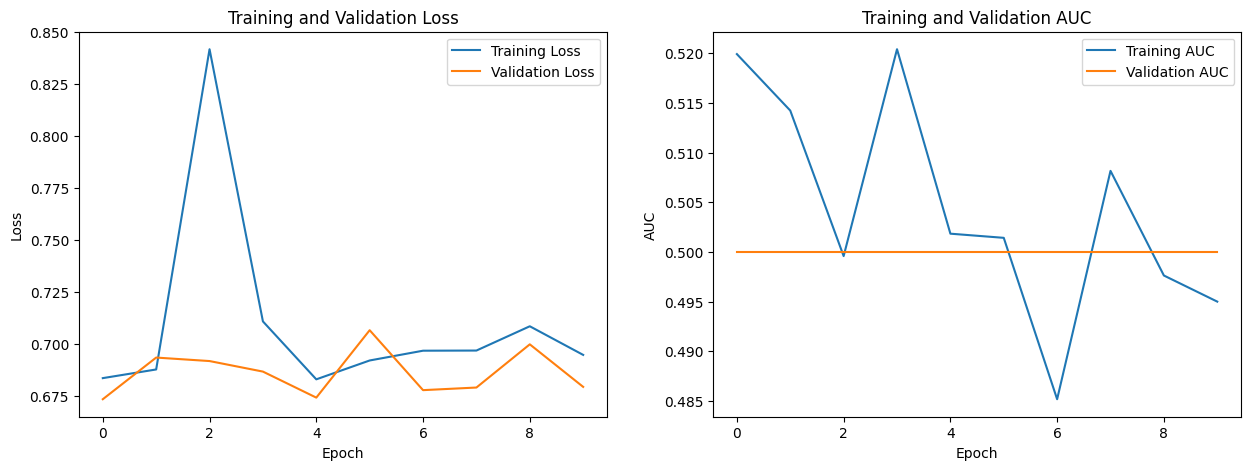

In [49]:
# plot the training and validation loss and AUC
def plot_metrics(history):
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))

    ax[0].plot(history.history['loss'], label='Training Loss')
    ax[0].plot(history.history['val_loss'], label='Validation Loss')
    ax[0].set_title('Training and Validation Loss')
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylabel('Loss')
    ax[0].legend()

    ax[1].plot(history.history['auc'], label='Training AUC')
    ax[1].plot(history.history['val_auc'], label='Validation AUC')
    ax[1].set_title('Training and Validation AUC')
    ax[1].set_xlabel('Epoch')
    ax[1].set_ylabel('AUC')
    ax[1].legend()

    plt.show()
    
plot_metrics(history)

## Results
The model has been trained on the training and validation datasets, and the training process has been tracked using the Area Under the Curve (AUC) metric. Further, the training and validation loss and AUC curves assist in understanding how well the model is performing and generalising. Below are some of the noteworthy points and course of action that could be adopted bolstered by the plots:

Throughout the epochs, the training and validation losses remain relatively constant to each other indicating that neither extreme overfitting nor extreme underfitting is taking place. The loss shows oscillations, with diminishing trends not observable, nor are gaps between training and validation loss substantial. This may imply that the model is perhaps training with certain level of turbulence or perhaps the learning rate is allowing oscillations to occur.

Validation loss, for instance, shows a substantial increase at epoch 7, which indicates that the model confidence is not sufficient enough to generalise.

AUC for the model evaluation on both training and validation data sets was oscillating but it seems that the validation AUC was reasonably higher than that of the training AUC. This means that the model has a good fit but does not have a good improvement on the validation set.


In [56]:
import tensorflow as tf
import numpy as np

height, width, channels = 224, 224, 3


def preprocess_image(image):
    # Normalize image to [0, 1] range
    image = tf.image.convert_image_dtype(image, tf.float32)
    return image

def generator_wrapper(generator):
    # Wrap the original generator to yield tf.Tensors
    for batch in generator:
        if isinstance(batch, tuple):  # For (images, labels)
            images, labels = batch
            yield preprocess_image(images), labels
        else:  # For images only
            yield preprocess_image(batch)

# Replace 'original_generator' with your existing generator object
test_generator = tf.data.Dataset.from_generator(
    lambda: generator_wrapper(original_generator), 
    output_signature=(
        tf.TensorSpec(shape=(None, height, width, channels), dtype=tf.float32),
        tf.TensorSpec(shape=(None,), dtype=tf.float32)  # If labels exist
    )
)



In [ ]:
target_height, target_width=224, 224

def preprocess_image_with_resize(image):
    # Resize images to model's expected input size
    image = tf.image.resize(image, [target_height, target_width])
    # Normalize image to [0, 1] range
    image = tf.image.convert_image_dtype(image, tf.float32)
    return image

def generator_with_resize_wrapper(generator):
    for batch in generator:
        if isinstance(batch, tuple):
            images, labels = batch
            yield preprocess_image_with_resize(images), labels
        else:
            yield preprocess_image_with_resize(batch)

test_generator = tf.data.Dataset.from_generator(
    lambda: generator_with_resize_wrapper(original_generator), 
    output_signature=(
        tf.TensorSpec(shape=(None, target_height, target_width, channels), dtype=tf.float32),
        tf.TensorSpec(shape=(None,), dtype=tf.float32)  # If labels exist
    )
)


TypeError: cannot unpack non-iterable int object

In [51]:
submission_df.head()

NameError: name 'submission_df' is not defined

<img src="submission.png">